In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1

  Preparing metadata (setup.py) ... done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=4c95b94de516261fe8bd2bf557429e5438e6cb1c71f6cb8c98949777f0ad91ab
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [69]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=500,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
#Question 1 - Extracting Tesla Stock Data Using yfinance

In [21]:
tesla = yf.Ticker('TSLA')

#extracting tesla data 
tesla_info = tesla.info
tesla_info['country']

'United States'

In [4]:
tesla_data = tesla.history(period="max")

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [ ]:
#Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [82]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tesla_data = requests.get(url).text

In [83]:
soup = BeautifulSoup(tesla_data, "html.parser")

In [84]:
tables = soup.find_all('table')
soup.find_all("tbody")[1]

<tbody>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>
</tr>
<tr>
<td style="text-align:center">2020-03-31</td>
<td style="text-align:center">$5,985</td>
</tr>
<tr>
<td style="text-align:center">2019-12-31</td>
<td style="text-align:center">$7,384</td>
</

In [85]:
#using BeautifulSoup or read_html function to extract tesla quarterly revenue
tesla_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text.replace('$', '').replace(',', '')
    
tesla_revenue = tesla_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index = True)

In [73]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [74]:
tesla_revenue.tail()

,Date,Revenue
46,2010-09-30,31
47,2010-06-30,28
48,2010-03-31,21
50,2009-09-30,46
51,2009-06-30,27


In [ ]:
#Question 3 - Extracting GameStop Stock Data Using yfinance

In [ ]:
GameStop = yf.Ticker('GME')

In [81]:
gme_data = GameStop.history(period = 'max')

In [33]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480516,6.773401,6.413185,6.766668,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665669,6.665669,6.312187,6.430014,1852600,0.0,0.0
4,2002-02-20,6.463680,6.648837,6.413182,6.648837,1723200,0.0,0.0


In [ ]:
#Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [34]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_data = requests.get(url).text

In [35]:
soup = BeautifulSoup(gme_data, "html.parser")
soup.find_all('title')

[<title>GameStop Revenue 2010-2022 | GME | MacroTrends</title>]

In [77]:
gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])
for row in soup.find_all('tbody')[1].find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    revenue = col[1].text.replace('$', '').replace(',','')
    gme_revenue = gme_revenue.append({'Date': date, "Revenue":revenue}, ignore_index = True)


In [79]:
#display last rows gamestop revenue using head() function.
gme_revenue.tail()

,Date,Revenue
48,2010-01-31,3524
49,2009-10-31,1835
50,2009-07-31,1739
51,2009-04-30,1981
52,2009-01-31,3492


In [ ]:
#Question 5 - Tesla Stock and Revenue Dashboard

In [80]:
make_graph(tesla_data, tesla_revenue,'Tesla')

AttributeError: 'str' object has no attribute 'Date'

In [ ]:
#Question 6 - GameStop Stock and Revenue Dashboard

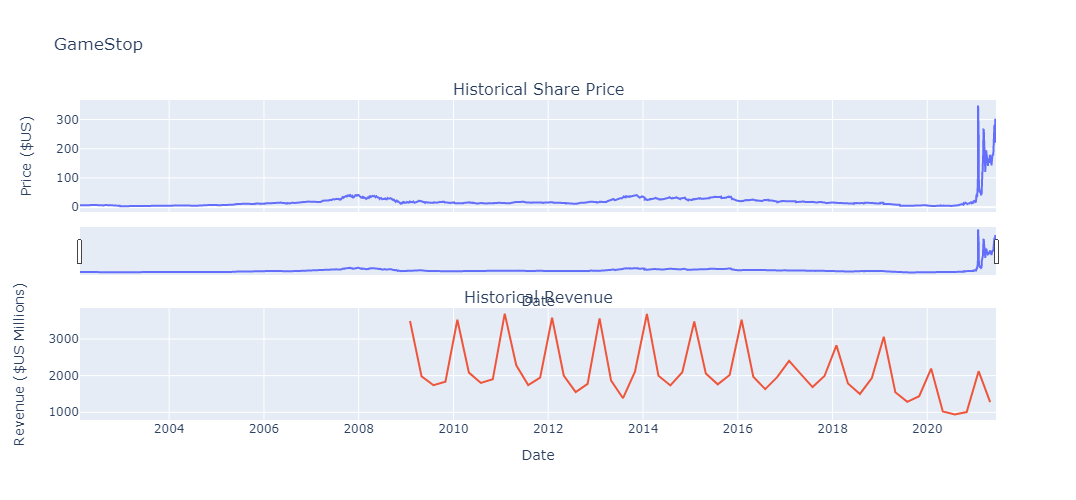

In [62]:
make_graph(gme_data, gme_revenue,'GameStop')